# read in image data

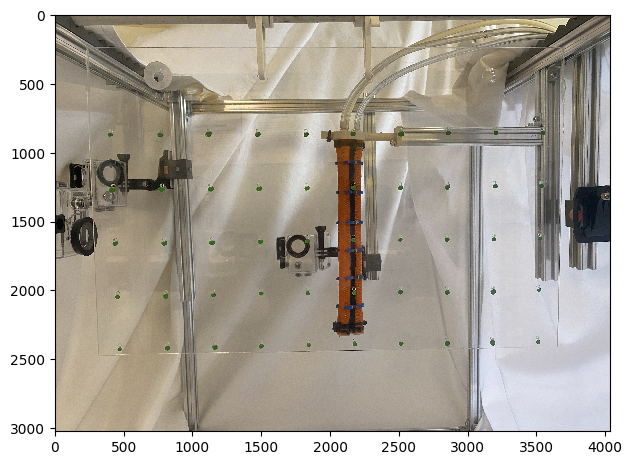

In [1]:
import skimage.io

image = skimage.io.imread("./image.png")
skimage.io.imshow(image)
# skimage.io.show()

# convert image to binary test

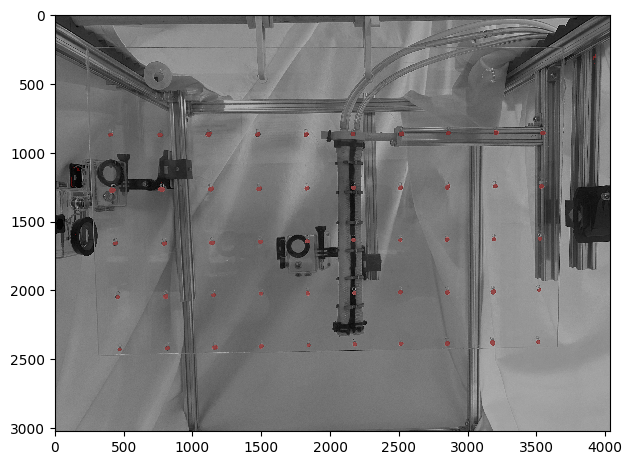

In [1]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, label2rgb
import numpy as np
from detect_centroids import *
from scipy import ndimage

image = skimage.io.imread("./image.png")

# Convert the image to the HSV color space
hsv_image = rgb2hsv(image)

# Threshold the hue & sat channel to obtain binary image
binary_image = image_to_binary("./image.png", 122, 40, 20)
# denoise image
binary_image = morphology.opening(binary_image, morphology.square(3))
# perform closing operation and eroding
binary_image = ndimage.binary_closing(binary_image, np.ones((7, 7)))

skimage.io.imshow(label2rgb(binary_image, image=image))

labeled_image = label2rgb(binary_image, image=image)
labeled_image = (labeled_image * 255).astype(np.uint8)
skimage.io.imsave("testout.png", labeled_image)

# calculate and display centroids of blobs test

In [19]:
import cv2
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.draw import circle_perimeter

denoised_image = binary_image

# scikit-image tool for collecting connected components
label_im = label(denoised_image)
region_data = regionprops(label_im)
region_data = sorted(
    region_data, key=lambda x: x.area, reverse=True
)  # sorting regions based on area so that we grab the top 12 largest blobs

rgb_image = binary_image_to_RGB(denoised_image)
centroids = []
for r in region_data:
    centroids.append(r.centroid)
    rr, cc = circle_perimeter(int(r.centroid[0]), int(r.centroid[1]), 5)
    rgb_image[rr, cc, :] = (0, 0, 255)
    rgb_image[int(r.centroid[0]), int(r.centroid[1])] = (0, 0, 255)
    cv2.putText(rgb_image, f"{int(r.centroid[1])}, {int(r.centroid[0])}", (int(r.centroid[1] - 75), int(r.centroid[0] - 25)),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imwrite("draw_centroids.png", rgb_image)


True